<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.529069,86.009972,85.686221,-9.557483,222.667779,-2312.376903,2535.044682
1,0.0,1.0,24.938770,84.783922,77.263890,-3585.323306,-3388.336725,-1902.121358,-1486.215367
2,0.0,2.0,73.425076,90.854368,84.808369,-6686.333731,-6427.245917,-1917.451844,-4509.794073
3,0.0,3.0,65.185523,63.554195,84.416816,-5471.588136,-5248.431601,-2234.745232,-3013.686369
4,0.0,4.0,65.857108,95.689004,21.894260,13485.883670,13679.324042,3475.472726,10203.851316
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,37.735332,96.678827,27.839114,-7903.445662,-7731.192390,-4206.965176,-3524.227214
59996,999.0,56.0,57.396908,85.763269,50.120222,-1219.756524,-1016.476125,-2034.535175,1018.059049
59997,999.0,57.0,49.389456,27.913766,24.219047,727.829668,839.351937,317.701406,521.650531
59998,999.0,58.0,41.875419,42.110650,21.341881,-1027.895345,-912.567395,-987.468491,74.901096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.529069,86.009972,85.686221,-9.557483,222.667779,-2312.376903,2535.044682
1,0.0,1.0,24.938770,84.783922,77.263890,-3585.323306,-3388.336725,-1902.121358,-1486.215367
2,0.0,2.0,73.425076,90.854368,84.808369,-6686.333731,-6427.245917,-1917.451844,-4509.794073
3,0.0,3.0,65.185523,63.554195,84.416816,-5471.588136,-5248.431601,-2234.745232,-3013.686369
4,0.0,4.0,65.857108,95.689004,21.894260,13485.883670,13679.324042,3475.472726,10203.851316
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,37.735332,96.678827,27.839114,-7903.445662,-7731.192390,-4206.965176,-3524.227214
59996,999.0,56.0,57.396908,85.763269,50.120222,-1219.756524,-1016.476125,-2034.535175,1018.059049
59997,999.0,57.0,49.389456,27.913766,24.219047,727.829668,839.351937,317.701406,521.650531
59998,999.0,58.0,41.875419,42.110650,21.341881,-1027.895345,-912.567395,-987.468491,74.901096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    50.529069  86.009972  ... -2312.376903   2535.044682
      1.0    24.938770  84.783922  ... -1902.121358  -1486.215367
      2.0    73.425076  90.854368  ... -1917.451844  -4509.794073
      3.0    65.185523  63.554195  ... -2234.745232  -3013.686369
      4.0    65.857108  95.689004  ...  3475.472726  10203.851316
...                ...        ...  ...          ...           ...
999.0 55.0   37.735332  96.678827  ... -4206.965176  -3524.227214
      56.0   57.396908  85.763269  ... -2034.535175   1018.059049
      57.0   49.389456  27.913766  ...   317.701406    521.650531
      58.0   41.875419  42.110650  ...  -987.468491     74.901096
      59.0   61.235164  36.545933  ...   913.613168    391.299484

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    50.529069  86.009972  ... -2312.376903   2535.044682
      1.0    24.938770  84.783922  ... -1902.121358  -1486.215367
      2.0    73.425076  90.854368  ... -1917.451844  -4509.794073
      3.0    65.185523  63.554195  ... -2234.745232  -3013.686369
      4.0    65.857108  95.689004  ...  3475.472726  10203.851316
...                ...        ...  ...          ...           ...
999.0 55.0   37.735332  96.678827  ... -4206.965176  -3524.227214
      56.0   57.396908  85.763269  ... -2034.535175   1018.059049
      57.0   49.389456  27.913766  ...   317.701406    521.650531
      58.0   41.875419  42.110650  ...  -987.468491     74.901096
      59.0   61.235164  36.545933  ...   913.613168    391.299484

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.529069,86.009972,85.686221,-9.557483,222.667779,-2312.376903,2535.044682
1,0.0,1.0,24.938770,84.783922,77.263890,-3585.323306,-3388.336725,-1902.121358,-1486.215367
2,0.0,2.0,73.425076,90.854368,84.808369,-6686.333731,-6427.245917,-1917.451844,-4509.794073
3,0.0,3.0,65.185523,63.554195,84.416816,-5471.588136,-5248.431601,-2234.745232,-3013.686369
4,0.0,4.0,65.857108,95.689004,21.894260,13485.883670,13679.324042,3475.472726,10203.851316
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,37.735332,96.678827,27.839114,-7903.445662,-7731.192390,-4206.965176,-3524.227214
59996,999.0,56.0,57.396908,85.763269,50.120222,-1219.756524,-1016.476125,-2034.535175,1018.059049
59997,999.0,57.0,49.389456,27.913766,24.219047,727.829668,839.351937,317.701406,521.650531
59998,999.0,58.0,41.875419,42.110650,21.341881,-1027.895345,-912.567395,-987.468491,74.901096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    50.529069  86.009972  ... -2312.376903   2535.044682
      1.0    24.938770  84.783922  ... -1902.121358  -1486.215367
      2.0    73.425076  90.854368  ... -1917.451844  -4509.794073
      3.0    65.185523  63.554195  ... -2234.745232  -3013.686369
      4.0    65.857108  95.689004  ...  3475.472726  10203.851316
...                ...        ...  ...          ...           ...
999.0 55.0   37.735332  96.678827  ... -4206.965176  -3524.227214
      56.0   57.396908  85.763269  ... -2034.535175   1018.059049
      57.0   49.389456  27.913766  ...   317.701406    521.650531
      58.0   41.875419  42.110650  ...  -987.468491     74.901096
      59.0   61.235164  36.545933  ...   913.613168    391.299484

[60000 rows x 7 columns]

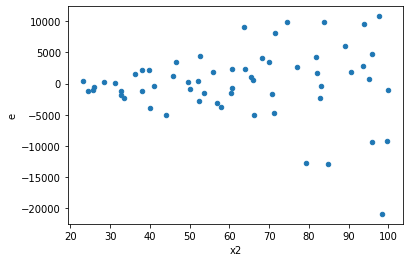

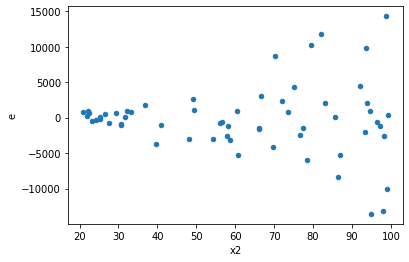

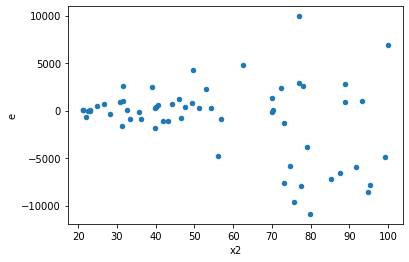

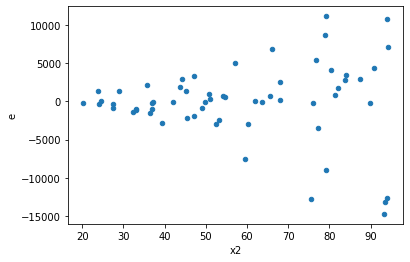

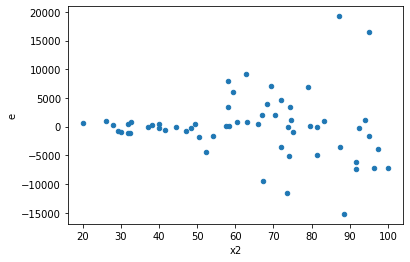

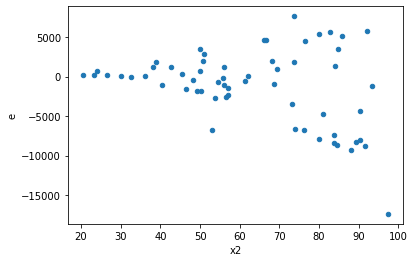

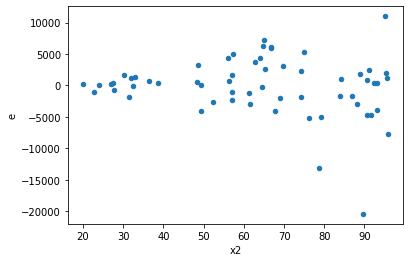

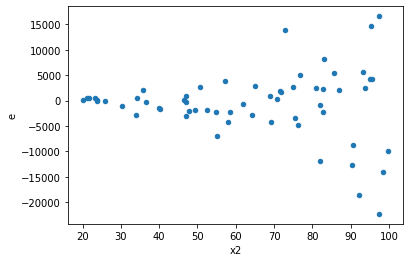

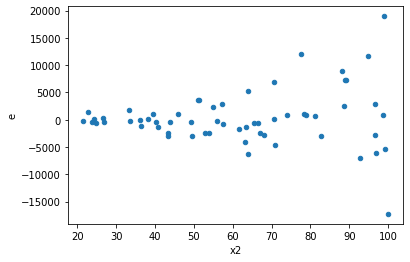

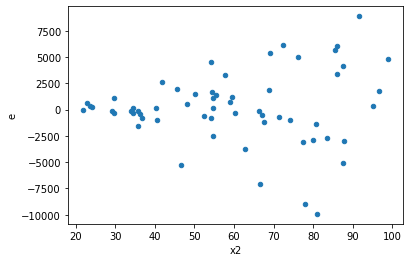

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,47840207.55664571,1349384085.4818769,2278105.1217450337,64256385.022946514,28.20606670412381,1.0937672989541625e-10,0.9999999999453116,5.4688364947708124e-11,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,76087780.7797331,413406976.2182504,3623227.656177767,19686046.486583352,5.433289970895909,0.0002761178314834023,0.9998619410842583,0.00013805891574170115,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,69419282.94420256,845208276.4309536,3305680.140200122,40248013.163378745,12.175410643614835,3.193185629246642e-07,0.9999998403407185,1.596592814623321e-07,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,26492296.216436796,961053846.4364729,1261537.915068419,45764468.87792728,36.27672884920408,9.015010959956271e-12,0.9999999999954925,4.5075054799781356e-12,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,24324197.489631854,319666645.47831446,1158295.1185538978,15222221.21325307,13.141919506884935,1.5931037999905584e-07,0.99999992034481,7.965518999952792e-08,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,74542103.65928859,832268890.8526138,3549623.983775647,39631851.94536256,11.165084562902672,6.95970163278048e-07,0.9999996520149184,3.47985081639024e-07,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,33562340.1412984,1547415573.3536887,1598206.6733951617,73686455.87398517,46.10571154570943,8.115730310009894e-13,0.9999999999995942,4.057865155004947e-13,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,34718584.79042568,1069164179.1618906,1653265.942401223,50912579.960090026,30.795154399747688,4.5963011174876556e-11,0.9999999999770185,2.2981505587438278e-11,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,50546158.99629266,543663138.4541806,2406959.9522044123,25888720.878770504,10.755775498076044,9.706407848586451e-07,0.9999995146796076,4.853203924293226e-07,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,47840207.55664571,1349384085.4818769,2278105.1217450337,64256385.022946514,28.20606670412381,1.0937672989541625e-10,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,76087780.7797331,413406976.2182504,3623227.656177767,19686046.486583352,5.433289970895909,0.0002761178314834023,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,69419282.94420256,845208276.4309536,3305680.140200122,40248013.163378745,12.175410643614835,3.193185629246642e-07,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,26492296.216436796,961053846.4364729,1261537.915068419,45764468.87792728,36.27672884920408,9.015010959956271e-12,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,24324197.489631854,319666645.47831446,1158295.1185538978,15222221.21325307,13.141919506884935,1.5931037999905584e-07,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,74542103.65928859,832268890.8526138,3549623.983775647,39631851.94536256,11.165084562902672,6.95970163278048e-07,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,33562340.1412984,1547415573.3536887,1598206.6733951617,73686455.87398517,46.10571154570943,8.115730310009894e-13,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,34718584.79042568,1069164179.1618906,1653265.942401223,50912579.960090026,30.795154399747688,4.5963011174876556e-11,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,50546158.99629266,543663138.4541806,2406959.9522044123,25888720.878770504,10.755775498076044,9.706407848586451e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64